# **PROJECT-CREDIT CARD FRAUD DETECTION**

# **ENTERY THE DATA**

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

df=pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11954,20631,1.504204,-0.411728,0.200090,-0.778753,-0.442232,-0.119677,-0.782660,-0.165178,0.691819,...,-0.136231,-0.217274,-0.143260,-1.057332,0.529188,-0.235062,-0.012089,0.000905,9.00,0.0
11955,20636,1.134994,0.096340,0.277921,0.319692,0.742800,1.611803,-0.458649,0.390012,1.424541,...,-0.395605,-0.743542,0.222256,-1.859104,-0.109777,0.279049,0.012398,-0.009090,0.99,0.0
11956,20638,-6.305012,3.944886,-4.707362,1.539602,-3.934785,-1.730565,-2.104936,3.843447,0.863458,...,0.073140,-0.039935,-0.108896,0.691434,-0.261979,-0.447540,0.212900,-0.031021,89.99,0.0
11957,20638,1.161960,-0.398297,1.123732,-0.474237,-1.226667,-0.519325,-0.804179,0.070134,3.262926,...,-0.121191,0.097255,0.050903,0.330479,0.315692,-0.712765,0.073836,0.028055,11.85,0.0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,...,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,...,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,...,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,...,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,...,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,...,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


# **CHECK MISSING VALUE IN THE DATA SET**

In [ ]:
# percentage of missing values in each column
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False)

Class     0.01
Amount    0.01
V28       0.01
V27       0.01
V26       0.01
V25       0.01
V24       0.01
V23       0.01
V22       0.01
V21       0.01
V20       0.01
V16       0.00
V19       0.00
V18       0.00
V17       0.00
Time      0.00
V1        0.00
V14       0.00
V13       0.00
V12       0.00
V11       0.00
V10       0.00
V9        0.00
V8        0.00
V7        0.00
V6        0.00
V5        0.00
V4        0.00
V3        0.00
V2        0.00
V15       0.00
dtype: float64

In [ ]:
# percentage of missing values in each row
round(100 * (df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

11958    0.09
7976     0.00
7967     0.00
7968     0.00
7969     0.00
         ... 
3989     0.00
3990     0.00
3991     0.00
3992     0.00
5979     0.00
Length: 11959, dtype: float64

# **DUPLICATE VALUE**

In [ ]:
card_d=df.copy()
card_d.drop_duplicates(subset=None, inplace=True)

In [ ]:
card_d

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11954,20631,1.504204,-0.411728,0.200090,-0.778753,-0.442232,-0.119677,-0.782660,-0.165178,0.691819,...,-0.136231,-0.217274,-0.143260,-1.057332,0.529188,-0.235062,-0.012089,0.000905,9.00,0.0
11955,20636,1.134994,0.096340,0.277921,0.319692,0.742800,1.611803,-0.458649,0.390012,1.424541,...,-0.395605,-0.743542,0.222256,-1.859104,-0.109777,0.279049,0.012398,-0.009090,0.99,0.0
11956,20638,-6.305012,3.944886,-4.707362,1.539602,-3.934785,-1.730565,-2.104936,3.843447,0.863458,...,0.073140,-0.039935,-0.108896,0.691434,-0.261979,-0.447540,0.212900,-0.031021,89.99,0.0
11957,20638,1.161960,-0.398297,1.123732,-0.474237,-1.226667,-0.519325,-0.804179,0.070134,3.262926,...,-0.121191,0.097255,0.050903,0.330479,0.315692,-0.712765,0.073836,0.028055,11.85,0.0


In [ ]:
card=card_d

In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11915 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11915 non-null  int64  
 1   V1      11915 non-null  float64
 2   V2      11915 non-null  float64
 3   V3      11915 non-null  float64
 4   V4      11915 non-null  float64
 5   V5      11915 non-null  float64
 6   V6      11915 non-null  float64
 7   V7      11915 non-null  float64
 8   V8      11915 non-null  float64
 9   V9      11915 non-null  float64
 10  V10     11915 non-null  float64
 11  V11     11915 non-null  float64
 12  V12     11915 non-null  float64
 13  V13     11915 non-null  float64
 14  V14     11915 non-null  float64
 15  V15     11915 non-null  float64
 16  V16     11915 non-null  float64
 17  V17     11915 non-null  float64
 18  V18     11915 non-null  float64
 19  V19     11915 non-null  float64
 20  V20     11914 non-null  float64
 21  V21     11914 non-null  float64
 22

In [ ]:
card.Class.value_counts()


0.0    11862
1.0       52
Name: Class, dtype: int64

# **CALCULATING CO-RELATION MATRIX**

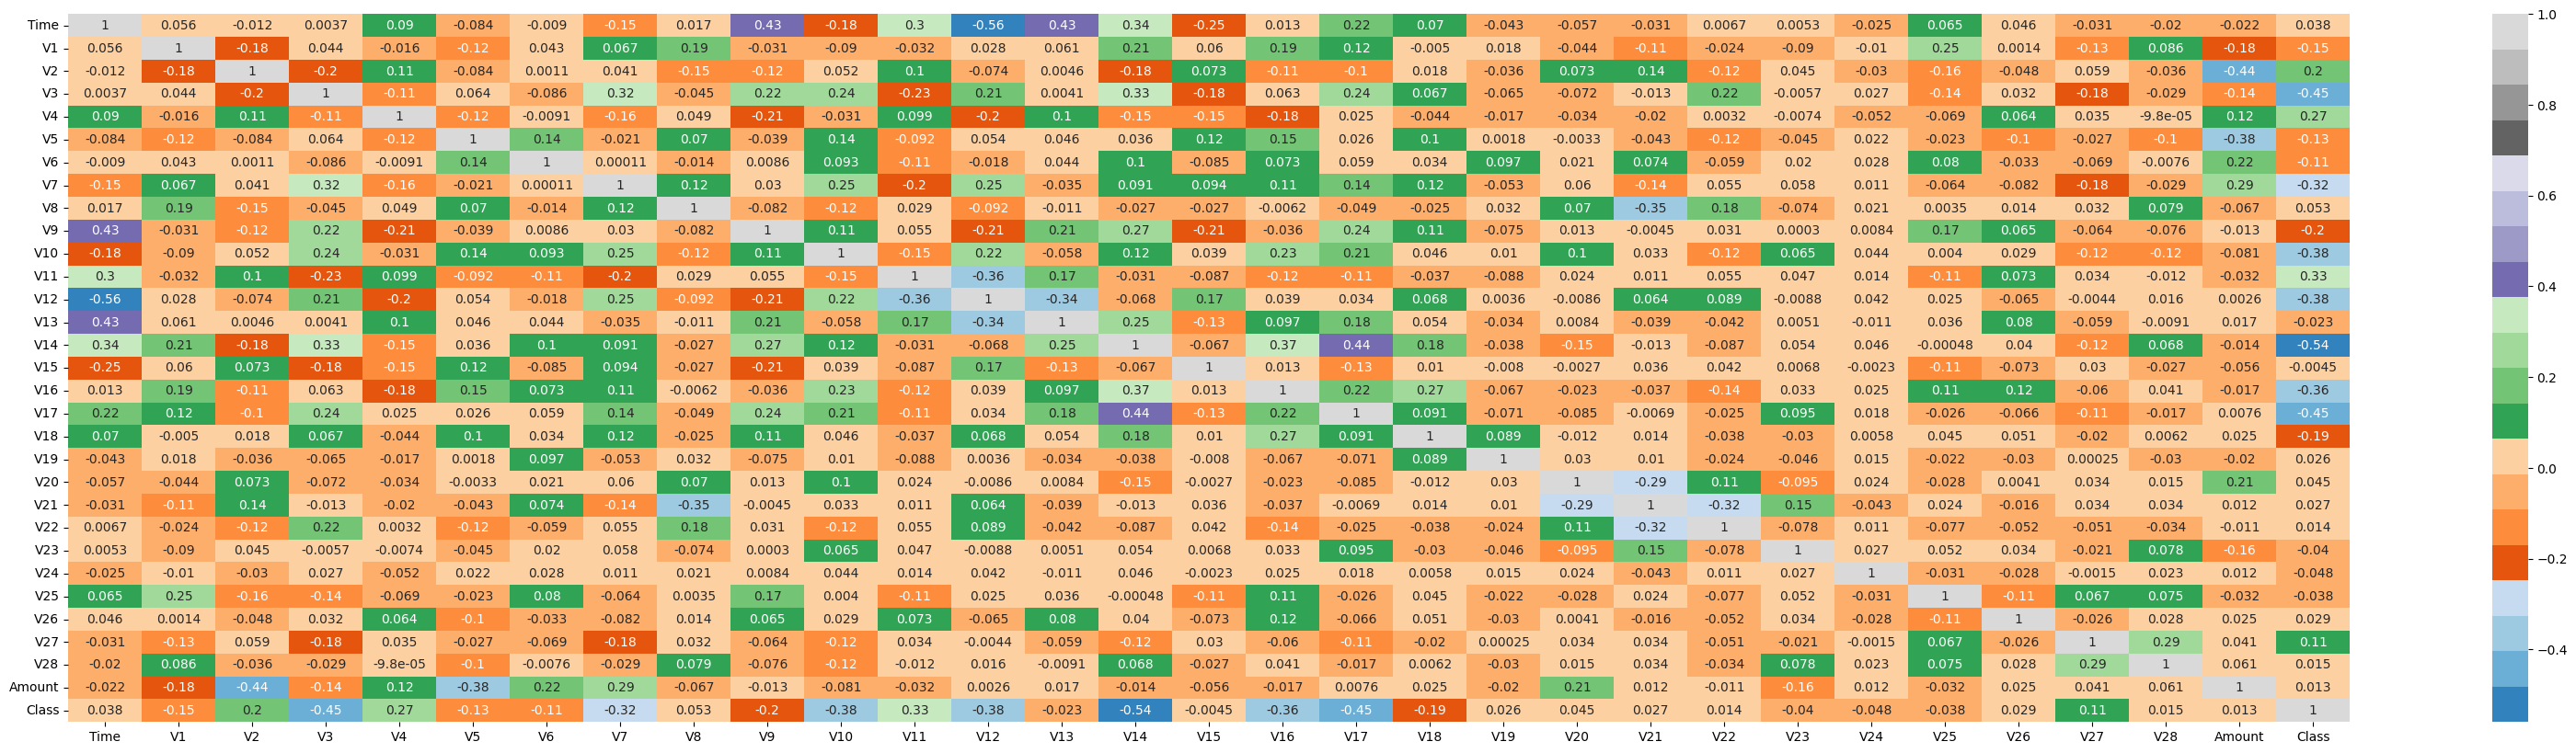

In [ ]:
plt.figure(figsize = (40,10))
sns.heatmap(card.corr(), annot = True, cmap="tab20c")
plt.show()

In [ ]:
#Dropping Time as it's non business required data
estimators=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X1 = card[estimators]
y = card['Class']

In [ ]:
col=X1.columns[:-1]
col

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [ ]:
#To remove the row that contains nan value
df=card.dropna()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11953,20625,-0.653155,0.372141,2.209254,-2.151937,0.451189,0.822337,0.267881,0.083443,2.295254,...,-0.149850,0.151803,-0.505597,-1.181476,0.535504,-0.759489,-0.068433,-0.176549,11.85,0.0
11954,20631,1.504204,-0.411728,0.200090,-0.778753,-0.442232,-0.119677,-0.782660,-0.165178,0.691819,...,-0.136231,-0.217274,-0.143260,-1.057332,0.529188,-0.235062,-0.012089,0.000905,9.00,0.0
11955,20636,1.134994,0.096340,0.277921,0.319692,0.742800,1.611803,-0.458649,0.390012,1.424541,...,-0.395605,-0.743542,0.222256,-1.859104,-0.109777,0.279049,0.012398,-0.009090,0.99,0.0
11956,20638,-6.305012,3.944886,-4.707362,1.539602,-3.934785,-1.730565,-2.104936,3.843447,0.863458,...,0.073140,-0.039935,-0.108896,0.691434,-0.261979,-0.447540,0.212900,-0.031021,89.99,0.0


# **Data normalising**

In [ ]:
#normalised the data
for column in df.columns[0:31]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())


# **Data Slicing**

In [ ]:
#slicing the data
X=df.iloc[:,:-1]
Y=(df.iloc[:,-1].values)
#Y2=Y.reshape(-1,1)

# **Data splitting**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

#logisticregression model creation
logit=LogisticRegression()
logit.fit(X_train,Y_train)

# predictions
y_pred=logit.predict(X_test)

# **Performance measure**

In [ ]:
#calculate true_positive,true_negative ,false_positive,false_negative
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y_test)):
  # if(y2_train[i] == 1 and class_list[i]==1)
  if(Y_test[i]==y_pred[i]==1):
    TP+=1
  elif(Y_test[i]==y_pred[i]==0):
    TN+=1
  elif(Y_test[i]==1 and y_pred[i]==0):
    FN+=1
  elif(Y_test[i]==0 and y_pred[i]==1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)


#calculate accuracy
#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)

True_positive= 5
True_negative= 2370
False_negative= 7
False_positive= 1
Accuracy of the model is= 0.9966428871170793
sensitivity of the model is= 0.4166666666666667
specificaty of the model is= 0.9995782370307887
precision of the model is=  0.8333333333333334
F_measure of the model is= 0.5555555555555556


# **Building A Random Forest ModeL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(X_test)

# **Performance Measure**

In [ ]:
#calculate true_positive,true_negative ,false_positive,false_negative
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y_test)):
  # if(y2_train[i] == 1 and class_list[i]==1)
  if(Y_test[i]==y_pred[i]==1):
    TP+=1
  elif(Y_test[i]==y_pred[i]==0):
    TN+=1
  elif(Y_test[i]==1 and y_pred[i]==0):
    FN+=1
  elif(Y_test[i]==0 and y_pred[i]==1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)


#calculate accuracy
#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)

True_positive= 11
True_negative= 2371
False_negative= 1
False_positive= 0
Accuracy of the model is= 0.9995803608896349
sensitivity of the model is= 0.9166666666666666
specificaty of the model is= 1.0
precision of the model is=  1.0
F_measure of the model is= 0.9565217391304348


# **Decession Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Create a decession tree classifier
clf=DecisionTreeClassifier()

#Train the model on the training data
clf.fit(X_train,Y_train)


DecisionTreeClassifier()

In [ ]:
y_predict=clf.predict(X_test)

In [ ]:
#calculate true_positive,true_negative ,false_positive,false_negative
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y_test)):
  # if(y2_train[i] == 1 and class_list[i]==1)
  if(Y_test[i]==y_pred[i]==1):
    TP+=1
  elif(Y_test[i]==y_pred[i]==0):
    TN+=1
  elif(Y_test[i]==1 and y_pred[i]==0):
    FN+=1
  elif(Y_test[i]==0 and y_pred[i]==1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)


#calculate accuracy
#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)

True_positive= 11
True_negative= 2371
False_negative= 1
False_positive= 0
Accuracy of the model is= 0.9995803608896349
sensitivity of the model is= 0.9166666666666666
specificaty of the model is= 1.0
precision of the model is=  1.0
F_measure of the model is= 0.9565217391304348


# **TO FIND THE BEST PARAMETER**

In [ ]:
from sklearn.model_selection import GridSearchCV

#define the parameter grid
param_grid={'n_estimators':[5,5,10],
            'max_depth':[5,5,5],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4]}
# Use GridSearchCV to obtain the best parameters for the model
grid_search=GridSearchCV(rfc,param_grid=param_grid,n_jobs=-1)

grid_search.fit(X_train,Y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_

In [ ]:
best_params

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

# **Using Xg Boosting**

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_predict=clf.predict(X_test)
#calculate true_positive,true_negative ,false_positive,false_negative
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y_test)):
  # if(y2_train[i] == 1 and class_list[i]==1)
  if(Y_test[i]==y_pred[i]==1):
    TP+=1
  elif(Y_test[i]==y_pred[i]==0):
    TN+=1
  elif(Y_test[i]==1 and y_pred[i]==0):
    FN+=1
  elif(Y_test[i]==0 and y_pred[i]==1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)


#calculate accuracy
#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)

True_positive= 11
True_negative= 2371
False_negative= 1
False_positive= 0
Accuracy of the model is= 0.9995803608896349
sensitivity of the model is= 0.9166666666666666
specificaty of the model is= 1.0
precision of the model is=  1.0
F_measure of the model is= 0.9565217391304348


# **USING ANN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))


Epoch 1/10
298/298 [==============================] - 2s 2ms/step - loss: 0.0702 - accuracy: 0.9903
Epoch 2/10
298/298 [==============================] - 1s 2ms/step - loss: 0.0122 - accuracy: 0.9981
Epoch 3/10
298/298 [==============================] - 1s 2ms/step - loss: 0.0096 - accuracy: 0.9982
Epoch 4/10
298/298 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9988
Epoch 5/10
298/298 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9986
Epoch 6/10
298/298 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9988
Epoch 7/10
298/298 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9984
Epoch 8/10
298/298 [==============================] - 1s 2ms/step - loss: 0.0047 - accuracy: 0.9986
Epoch 9/10
298/298 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 0.9992
Epoch 10/10
75/75 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[2371    0]
 [ 